In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np

# data processing
import pandas as pd


# data visualization
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style

# Algorithms
from sklearn.tree import DecisionTreeClassifier


In [ ]:
from zipfile import ZipFile
zip_file = ZipFile('//content/drive/MyDrive/IA/titanic.zip')

data_train = pd.read_csv(zip_file.open('train.csv'))
data_test = pd.read_csv(zip_file.open('test.csv'))
data_gender = pd.read_csv(zip_file.open('gender_submission.csv'))

In [ ]:
data_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
alldata = [data_train, data_test]

In [ ]:
data_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
data_train.corr()

<ipython-input-8-e6bb2ed549f3>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data_train.corr()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [ ]:
data_train.columns.values

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

In [ ]:
data_train.columns.values.shape

(12,)

In [ ]:
data_train['Embarked'].describe()

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

In [ ]:
data_train['Embarked'].isna().sum()

2

In [ ]:
common_value = 'S'

for dataset in alldata:
    dataset['Embarked'] = dataset['Embarked'].fillna(common_value)

In [ ]:
data_train['Embarked'].isna().sum()

0

In [ ]:
for dataset in alldata:
    dataset['Fare'] = dataset['Fare'].fillna(0)
    dataset['Fare'] = dataset['Fare'].astype(int)

In [ ]:
genders = {'male': 0, 'female': 1}

for dataset in alldata:
    dataset['Sex'] = dataset['Sex'].map(genders)

In [ ]:
ports = {"S": 0, "C": 1, "Q": 2}

for dataset in alldata:
    dataset['Embarked'] = dataset['Embarked'].map(ports)

In [ ]:
data_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7,NaN,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71,C85,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7,NaN,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53,C123,0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8,NaN,0


In [ ]:
data_train = data_train.drop(['PassengerId','Name','Ticket','Cabin','Fare'], axis=1)
data_test  = data_test.drop(['PassengerId','Name','Ticket','Cabin','Fare'], axis=1)

In [ ]:
data_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,0,22.0,1,0,0
1,1,1,1,38.0,1,0,1
2,1,3,1,26.0,0,0,0
3,1,1,1,35.0,1,0,0
4,0,3,0,35.0,0,0,0


In [ ]:
data_test.head()

,Pclass,Sex,Age,SibSp,Parch,Embarked
0,3,0,34.5,0,0,2
1,3,1,47.0,1,0,0
2,2,0,62.0,0,0,2
3,3,0,27.0,0,0,0
4,3,1,22.0,1,1,0


In [ ]:
data_test.insert(loc=0, column='Survived', value=data_gender['Survived'].values)



In [ ]:
data_test.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,0,34.5,0,0,2
1,1,3,1,47.0,1,0,0
2,0,2,0,62.0,0,0,2
3,0,3,0,27.0,0,0,0
4,1,3,1,22.0,1,1,0


In [ ]:
data_test.shape

(418, 7)

In [ ]:
data_train['Age'].isna().sum()

177

In [ ]:
np.random.seed(0)

In [ ]:
mean = data_train["Age"].mean()
std = data_train["Age"].std()
list_isna = data_train['Age'].isna()
for line in range(list_isna.shape[0]):
    if(list_isna[line]==True):
      #print("Antes",line,data_train.iloc[line]["Age"])
      rand_age = np.random.randint(mean - std, mean + std, 1)
      #print(rand_age)
      data_train.at[line,'Age']=rand_age
      #print("Depois",line,data_train.iloc[line]["Age"])


In [ ]:

data_train["Age"].isnull().sum()

0

In [ ]:
data_test["Age"].isnull().sum()

86

In [ ]:
mean = data_test["Age"].mean()
std = data_test["Age"].std()
list_isna = data_test['Age'].isna()
for line in range(list_isna.shape[0]):
    if(list_isna[line]==True):
      #print("Antes",line,data_test.iloc[line]["Age"])
      rand_age = np.random.randint(mean - std, mean + std, 1)
      #print(rand_age)
      data_test.at[line,'Age']=rand_age
      #print("Depois",line,data_test.iloc[line]["Age"])

In [ ]:
data_test["Age"].isnull().sum()

0

In [ ]:
data_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,0,22.0,1,0,0
1,1,1,1,38.0,1,0,1
2,1,3,1,26.0,0,0,0
3,1,1,1,35.0,1,0,0
4,0,3,0,35.0,0,0,0


In [ ]:
data_train["Age"] = data_train["Age"].astype(int)
data_test["Age"] = data_test["Age"].astype(int)

In [ ]:
X = data_train.drop(['Age'], axis=1).values
Y = data_train['Age'].values

In [ ]:
#https://mljar.com/blog/visualize-decision-tree/

In [ ]:
attributes = data_train.columns.values.tolist()
del attributes[0]
print(attributes)

#decisoes = np.unique(data_train['Survived'].values).tolist()
#print(decisoes)
#decisoes = map(str, decisoes)
#print(decisoes)
decisoes = ['0','1']


['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Embarked']


In [ ]:
#X_test = data_test.values
#Y_pred = clf.predict(X_test)

In [ ]:
Y_test = data_gender['Survived'].values
print(Y_test)

[0 1 0 0 1 0 1 0 1 0 0 0 1 0 1 1 0 0 1 1 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 0 1
 1 0 0 0 0 0 1 1 0 0 0 1 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 0 1 1 0 0 1 1 0 1 0
 1 0 0 1 0 1 0 0 0 0 0 0 1 1 1 0 1 0 1 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 1 1 0 0 1 0 1 1 0 1 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0
 0 0 1 0 0 1 0 0 1 1 0 1 1 0 1 0 0 1 0 0 1 1 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1
 0 1 0 1 0 0 0 0 0 0 0 0 1 0 1 1 0 0 1 0 0 1 0 1 0 0 0 0 1 1 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 1 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 1 0 0 0 0
 1 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0
 1 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 0 1 1 0 1 1 0
 0 1 0 0 1 1 1 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0
 0 1 1 1 1 1 0 1 0 0 0]


In [ ]:
data_train.columns.values

array(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Embarked'],
      dtype=object)

In [ ]:
data_train.drop(['Survived'], axis=1).values

array([[ 3,  0, 22,  1,  0,  0],
       [ 1,  1, 38,  1,  0,  1],
       [ 3,  1, 26,  0,  0,  0],
       ...,
       [ 3,  1, 34,  1,  2,  0],
       [ 1,  0, 26,  0,  0,  1],
       [ 3,  0, 32,  0,  0,  2]])

In [ ]:
data_train['Survived'].values

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,

In [ ]:
aux = np.where(data_gender['Survived'].values==0)[0]
aux.shape

(266,)

In [ ]:
data_gender.shape

(418, 2)

In [ ]:
data_gender.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [ ]:
data_test['Survived'] = data_gender['Survived']

In [ ]:
data_test.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,0,34,0,0,2
1,1,3,1,47,1,0,0
2,0,2,0,62,0,0,2
3,0,3,0,27,0,0,0
4,1,3,1,22,1,1,0


In [ ]:
data_test.corr()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
Survived,1.000000,-0.108615,1.000000,-0.003778,0.099943,0.159120,0.126779
Pclass,-0.108615,1.000000,-0.108615,-0.430290,0.001087,0.018721,0.031096
Sex,1.000000,-0.108615,1.000000,-0.003778,0.099943,0.159120,0.126779
Age,-0.003778,-0.430290,-0.003778,1.000000,-0.067480,-0.050601,0.057969
SibSp,0.099943,0.001087,0.099943,-0.067480,1.000000,0.306895,-0.100603
Parch,0.159120,0.018721,0.159120,-0.050601,0.306895,1.000000,-0.125164
Embarked,0.126779,0.031096,0.126779,0.057969,-0.100603,-0.125164,1.000000


Início da Atividade de Regressão Linear

In [ ]:
# 1- juntar todos os dados em apenas uma planilha; ok
# 2- separar os dados em k-folds, onde k=5; ok
# 3- realizar tarefa de regressão de AGE utilizando modelos lineares;
# 4- Utilizar as medidas de avaliação MSE, MAE e MAPE, guardando numa lista cada valor de k para cada medida;
# 5- Criar gráficos de barras ou candlestick com média e desvio padrão de cada medida;
# 6- Repetir mesmos passos 1--5 para o algoritmo de árvores de decisão;


In [ ]:
full_data = pd.concat([data_train, data_test])
full_data.shape

(1309, 7)

In [ ]:
nulos = np.where(full_data['Age'].values==0)
print(nulos)
full_data.values[nulos,3] = 1

(array([  78,  305,  469,  644,  755,  803,  831, 1092, 1141, 1172, 1198,
       1245]),)


In [ ]:
np.where(full_data['Age'].values==0)

(array([], dtype=int64),)

In [ ]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=5,random_state=0,shuffle=True)

In [ ]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
from sklearn.tree import DecisionTreeRegressor

# Listas para a Regressão Linear
test_values_reg = []
resultsMSE = []
resultsMAE = []
resultsMAPE = []

# Listas para a Árvore de Regressão
test_values_tree = []
resultsMSE_tree = []
resultsMAE_tree = []
resultsMAPE_tree = []

for i, (train_index, test_index) in enumerate(kf.split(full_data)):
  # print(f"  Fold {i}:")
  # print(f"  Train Size={train_index.shape}")
  # print(f"  Test Size={test_index.shape}")
  # print(f"  Train: index={train_index}")
  # print(f"  Test:  index={test_index}")

  Y_train = full_data.values[train_index][:,3]
  X_train = full_data.values[train_index]
  X_train = np.delete(X_train, 3, 1)

  Y_test = full_data.values[test_index][:,3] # Y_test = verdade
  X_test = full_data.values[test_index]
  X_test = np.delete(X_test, 3, 1)


  # Criação dos Modelos

  reg = linear_model.Lasso(alpha=0.1)
  reg.fit(X_train,Y_train)
  Y_pred = reg.predict(X_test)
  test_values_reg.append(Y_pred)

  clf = DecisionTreeRegressor(random_state=0, criterion="poisson", splitter="best", max_depth=5, min_samples_split=10)
  clf.fit(X_train,Y_train)
  Y_pred_tree = clf.predict(X_test)
  test_values_tree.append(Y_pred_tree)


  # Métricas - Regressão Linear
  mse = mean_squared_error(Y_test, Y_pred)
  resultsMSE.append(mse)

  mae = mean_absolute_error(Y_test, Y_pred)
  resultsMAE.append(mae)

  mape = mean_absolute_percentage_error(Y_test, Y_pred)
  resultsMAPE.append(mape)

  # Métricas - Árvore
  mse_tree = mean_squared_error(Y_test, Y_pred_tree)
  resultsMSE_tree.append(mse_tree)

  mae_tree = mean_absolute_error(Y_test, Y_pred_tree)
  resultsMAE_tree.append(mae_tree)

  mape_tree = mean_absolute_percentage_error(Y_test, Y_pred_tree)
  resultsMAPE_tree.append(mape_tree)


print(resultsMSE)
print(resultsMAE)
print(resultsMAPE)

print("\n")

print(resultsMSE_tree)
print(resultsMAE_tree)
print(resultsMAPE_tree)


[154.78473063838877, 150.44815580021108, 139.70655280491133, 156.56474268420325, 157.493452806951]
[9.867715400791148, 9.711649437196357, 9.25206619383911, 9.876463596147984, 9.86592756620746]
[0.7389096401110165, 0.8886113321463408, 0.8578402650107404, 0.8952794219469953, 1.276446407983478]


[131.83360425716947, 140.48859480843106, 131.60558333504443, 133.79962855912163, 146.65513091481418]
[9.15345019690633, 9.322793353514774, 8.87852005693493, 9.06144134358675, 9.429806889107093]
[0.6317457641618084, 0.6627276227039713, 0.5910366658137384, 0.6405395282208972, 1.0155873699416245]


In [ ]:
# Média
average_mse = np.mean(resultsMSE)
average_mae = np.mean(resultsMAE)
average_mape = np.mean(resultsMAPE)
average_mse_tree = np.mean(resultsMSE_tree)
average_mae_tree = np.mean(resultsMAE_tree)
average_mape_tree = np.mean(resultsMAPE_tree)
# print(f'\nmedias\nregr > mse: {average_mse} mae: {average_mae} mape: {average_mape}\ntree > mse: {average_mse_tree} mae: {average_mae_tree} mape: {average_mape_tree}')

# Desvio padrão
std_deviation_mse = np.std(resultsMSE)
std_deviation_mae = np.std(resultsMAE)
std_deviation_mape = np.std(resultsMAPE)
std_deviation_mse_tree = np.std(resultsMSE_tree)
std_deviation_mae_tree = np.std(resultsMAE_tree)
std_deviation_mape_tree = np.std(resultsMAPE_tree)
# print(f'\ndesvio padrao\nregr > mse: {std_deviation_mse} mae: {std_deviation_mae} mape: {std_deviation_mape}\ntree > mse: {std_deviation_mse_tree} mae: {std_deviation_mae_tree} mape: {std_deviation_mape_tree}')



Gráficos da **Regressão Linear**

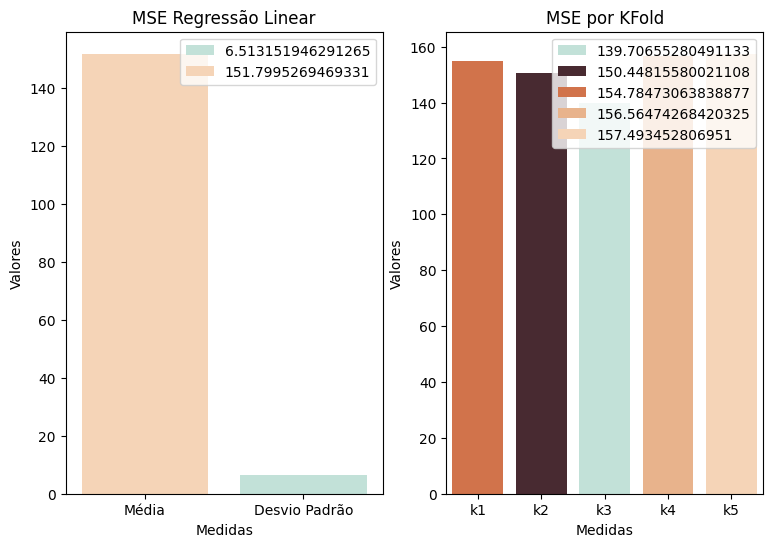

In [ ]:
# ----------------   GRÁFICOS MSE   ----------------

fig, (axis1, axis2) = plt.subplots(1,2, figsize=(9,6))

x_mse = ['Média', 'Desvio Padrão']
y_mse = [average_mse, std_deviation_mse]
sns.barplot(
    x=x_mse,
    y=y_mse,
    hue=y_mse,
    ax=axis1,
    palette="icefire"
)

axis1.set_title('MSE Regressão Linear')
axis1.set_xlabel('Medidas')
axis1.set_ylabel('Valores')


x_mse2 = ['k1', 'k2', 'k3', 'k4', 'k5']
y_mse2 = [resultsMSE[0], resultsMSE[1], resultsMSE[2], resultsMSE[3], resultsMSE[4]]
sns.barplot(
    x=x_mse2,
    y=y_mse2,
    hue=y_mse2,
    ax=axis2,
    palette="icefire"
)

axis2.set_title('MSE por KFold')
axis2.set_xlabel('Medidas')
axis2.set_ylabel('Valores')

plt.show()

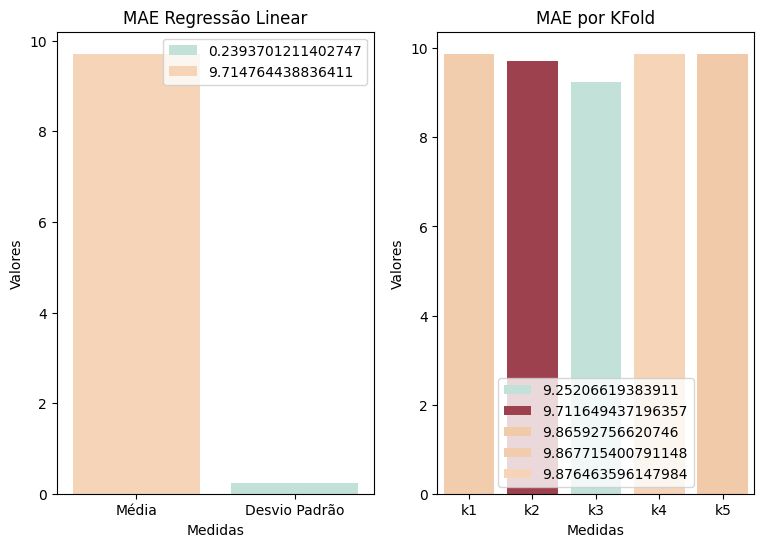

In [ ]:
# ----------------   GRÁFICOS MAE   ----------------

fig, (axis1, axis2) = plt.subplots(1,2, figsize=(9,6))

x_mae = ['Média', 'Desvio Padrão']
y_mae = [average_mae, std_deviation_mae]
sns.barplot(
    x=x_mae,
    y=y_mae,
    hue=y_mae,
    ax=axis1,
    palette="icefire"
)

axis1.set_title('MAE Regressão Linear')
axis1.set_xlabel('Medidas')
axis1.set_ylabel('Valores')


x_mae2 = ['k1', 'k2', 'k3', 'k4', 'k5']
y_mae2 = [resultsMAE[0], resultsMAE[1], resultsMAE[2], resultsMAE[3], resultsMAE[4]]
sns.barplot(
    x=x_mae2,
    y=y_mae2,
    hue=y_mae2,
    ax=axis2,
    palette="icefire"
)

axis2.set_title('MAE por KFold')
axis2.set_xlabel('Medidas')
axis2.set_ylabel('Valores')

plt.show()

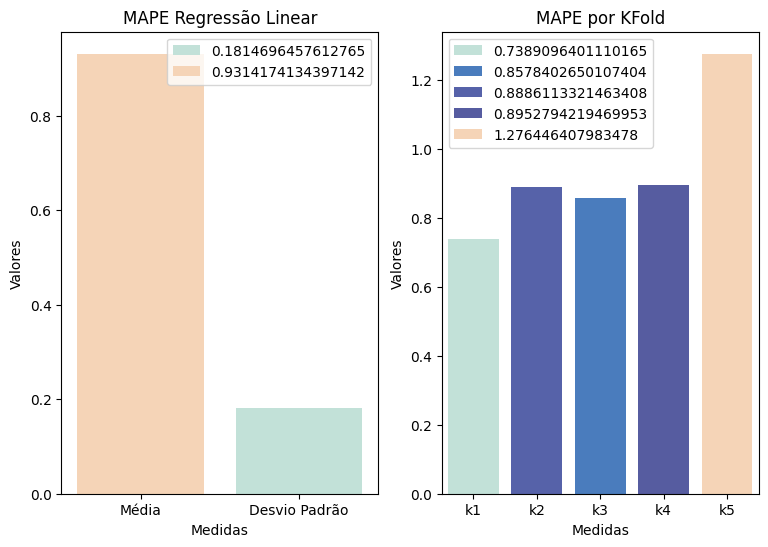

In [ ]:
# ----------------   GRÁFICOS MAPE   ----------------

fig, (axis1, axis2) = plt.subplots(1,2, figsize=(9,6))

x_mape = ['Média', 'Desvio Padrão']
y_mape = [average_mape, std_deviation_mape]
sns.barplot(
    x=x_mape,
    y=y_mape,
    hue=y_mape,
    ax=axis1,
    palette="icefire"
)

axis1.set_title('MAPE Regressão Linear')
axis1.set_xlabel('Medidas')
axis1.set_ylabel('Valores')


x_mape2 = ['k1', 'k2', 'k3', 'k4', 'k5']
y_mape2 = [resultsMAPE[0], resultsMAPE[1], resultsMAPE[2], resultsMAPE[3], resultsMAPE[4]]
sns.barplot(
    x=x_mape2,
    y=y_mape2,
    hue=y_mape2,
    ax=axis2,
    palette="icefire"
)

axis2.set_title('MAPE por KFold')
axis2.set_xlabel('Medidas')
axis2.set_ylabel('Valores')

plt.show()

Gráficos da **Árvore de Regressão**

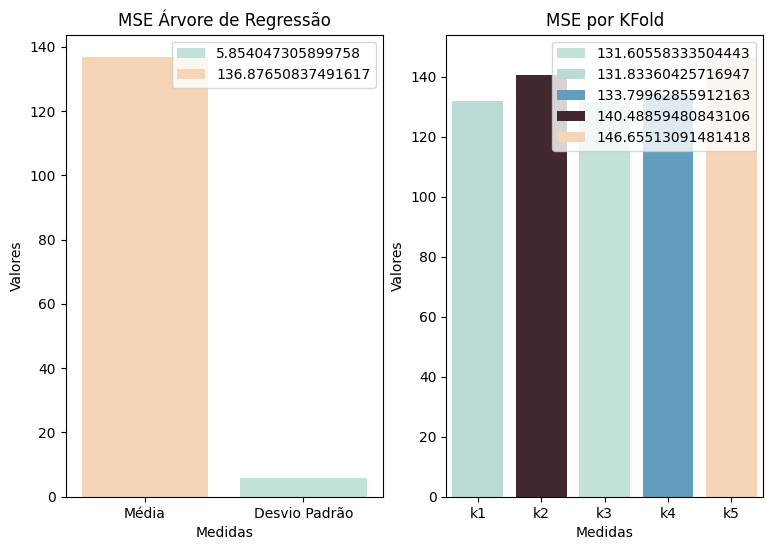

In [ ]:
# ----------------   GRÁFICOS MSE   ----------------

fig, (axis1, axis2) = plt.subplots(1,2, figsize=(9,6))

x_mse_tree = ['Média', 'Desvio Padrão']
y_mse_tree = [average_mse_tree, std_deviation_mse_tree]
sns.barplot(
    x=x_mse_tree,
    y=y_mse_tree,
    hue=y_mse_tree,
    ax=axis1,
    palette="icefire"
)

axis1.set_title('MSE Árvore de Regressão')
axis1.set_xlabel('Medidas')
axis1.set_ylabel('Valores')


x_mse2_tree = ['k1', 'k2', 'k3', 'k4', 'k5']
y_mse2_tree = [resultsMSE_tree[0], resultsMSE_tree[1], resultsMSE_tree[2], resultsMSE_tree[3], resultsMSE_tree[4]]
sns.barplot(
    x=x_mse2_tree,
    y=y_mse2_tree,
    hue=y_mse2_tree,
    ax=axis2,
    palette="icefire"
)

axis2.set_title('MSE por KFold')
axis2.set_xlabel('Medidas')
axis2.set_ylabel('Valores')

plt.show()

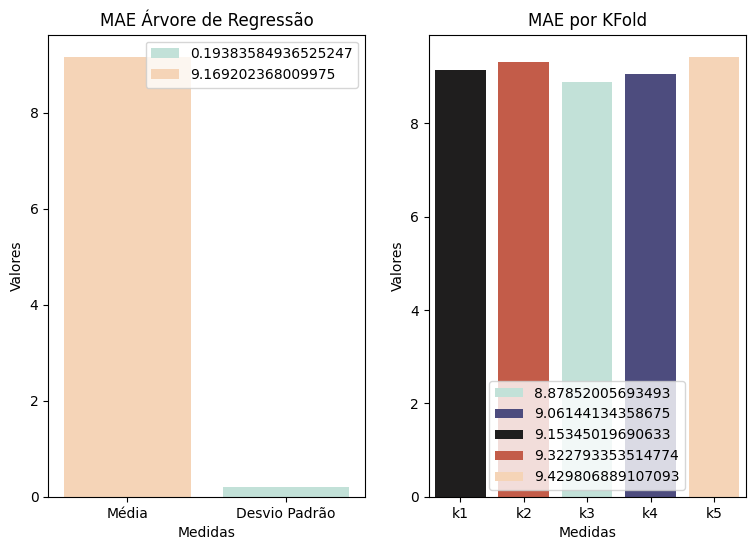

In [ ]:
# ----------------   GRÁFICOS MAE   ----------------

fig, (axis1, axis2) = plt.subplots(1,2, figsize=(9,6))

x_mae_tree = ['Média', 'Desvio Padrão']
y_mae_tree = [average_mae_tree, std_deviation_mae_tree]
sns.barplot(
    x=x_mae_tree,
    y=y_mae_tree,
    hue=y_mae_tree,
    ax=axis1,
    palette="icefire"
)

axis1.set_title('MAE Árvore de Regressão')
axis1.set_xlabel('Medidas')
axis1.set_ylabel('Valores')


x_mae2_tree = ['k1', 'k2', 'k3', 'k4', 'k5']
y_mae2_tree = [resultsMAE_tree[0], resultsMAE_tree[1], resultsMAE_tree[2], resultsMAE_tree[3], resultsMAE_tree[4]]
sns.barplot(
    x=x_mae2_tree,
    y=y_mae2_tree,
    hue=y_mae2_tree,
    ax=axis2,
    palette="icefire"
)

axis2.set_title('MAE por KFold')
axis2.set_xlabel('Medidas')
axis2.set_ylabel('Valores')

plt.show()

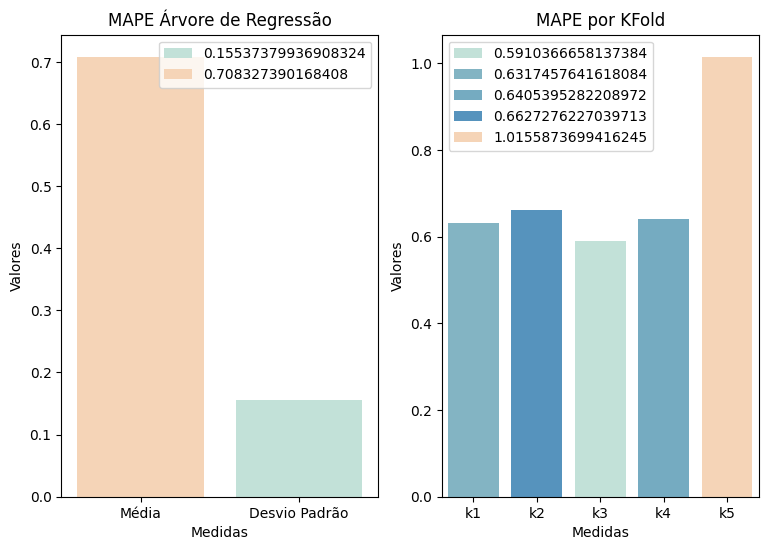

In [ ]:
# ----------------   GRÁFICOS MAPE   ----------------

fig, (axis1, axis2) = plt.subplots(1,2, figsize=(9,6))

x_mape_tree = ['Média', 'Desvio Padrão']
y_mape_tree = [average_mape_tree, std_deviation_mape_tree]
sns.barplot(
    x=x_mape_tree,
    y=y_mape_tree,
    hue=y_mape_tree,
    ax=axis1,
    palette="icefire"
)

axis1.set_title('MAPE Árvore de Regressão')
axis1.set_xlabel('Medidas')
axis1.set_ylabel('Valores')


x_mape2_tree = ['k1', 'k2', 'k3', 'k4', 'k5']
y_mape2_tree = [resultsMAPE_tree[0], resultsMAPE_tree[1], resultsMAPE_tree[2], resultsMAPE_tree[3], resultsMAPE_tree[4]]
sns.barplot(
    x=x_mape2_tree,
    y=y_mape2_tree,
    hue=y_mape2_tree,
    ax=axis2,
    palette="icefire"
)

axis2.set_title('MAPE por KFold')
axis2.set_xlabel('Medidas')
axis2.set_ylabel('Valores')

plt.show()

Árvore de Regressão vs Regressão Linear

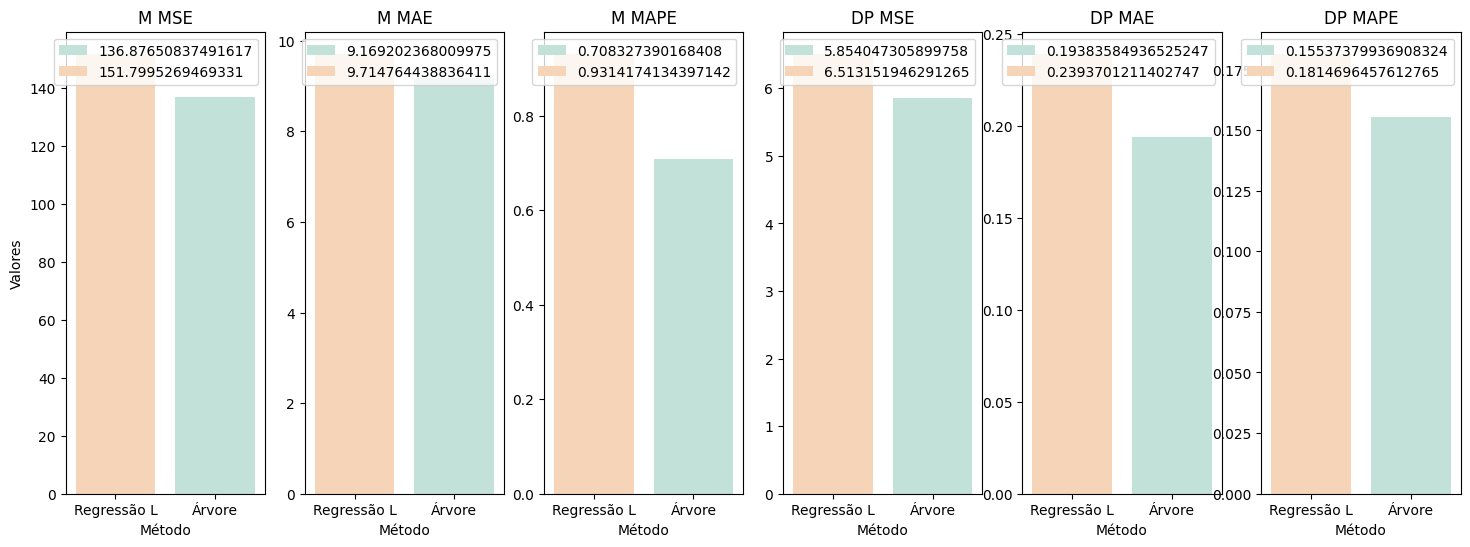

In [ ]:
# ----------------   ÁRVORE DE REGRESSÃO VS REGRESSÃO LINEAR   ----------------

fig, (axis1, axis2, axis3, axis4, axis5, axis6) = plt.subplots(1,6, figsize=(18,6))

##
x = ['Regressão L', 'Árvore']
y = [average_mse, average_mse_tree]
sns.barplot(
    x=x,
    y=y,
    hue=y,
    ax=axis1,
    palette="icefire"
)

axis1.set_title('M MSE')
axis1.set_xlabel('Método')
axis1.set_ylabel('Valores')

##
x = ['Regressão L', 'Árvore']
y = [average_mae, average_mae_tree]
sns.barplot(
    x=x,
    y=y,
    hue=y,
    ax=axis2,
    palette="icefire"
)

axis2.set_title('M MAE')
axis2.set_xlabel('Método')
# axis2.set_ylabel('Valores')

##
x = ['Regressão L', 'Árvore']
y = [average_mape, average_mape_tree]
sns.barplot(
    x=x,
    y=y,
    hue=y,
    ax=axis3,
    palette="icefire"
)

axis3.set_title('M MAPE')
axis3.set_xlabel('Método')
# axis3.set_ylabel('Valores')

##
x = ['Regressão L', 'Árvore']
y = [std_deviation_mse, std_deviation_mse_tree]
sns.barplot(
    x=x,
    y=y,
    hue=y,
    ax=axis4,
    palette="icefire"
)

axis4.set_title('DP MSE')
axis4.set_xlabel('Método')
# axis4.set_ylabel('Valores')

##
x = ['Regressão L', 'Árvore']
y = [std_deviation_mae, std_deviation_mae_tree]
sns.barplot(
    x=x,
    y=y,
    hue=y,
    ax=axis5,
    palette="icefire"
)

axis5.set_title('DP MAE')
axis5.set_xlabel('Método')
# axis5.set_ylabel('Valores')

##
x = ['Regressão L', 'Árvore']
y = [std_deviation_mape, std_deviation_mape_tree]
sns.barplot(
    x=x,
    y=y,
    hue=y,
    ax=axis6,
    palette="icefire"
)

axis6.set_title('DP MAPE')
axis6.set_xlabel('Método')
# axis6.set_ylabel('Valores')

plt.show()

In [ ]:
from sklearn import linear_model
reg = linear_model.Lasso(alpha=0.1)
reg.fit(X_train,Y_train)
Y_pred = reg.predict(X_test)

In [ ]:
reg.coef_

array([-2.85399005, -6.08995044,  0.09190538, -1.6709641 , -0.5956727 ,
        0.10520567])